In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

a = np.arange(8)
b = a[4:6]
b[:] = 40
c = a[4] + a[6]
c

46

In [3]:
import re
s = 'ABCAC'
s

'ABCAC'

In [4]:
#len(re.search('A', s)) == 2

In [5]:
bool(re.match('A', s)) == True

True

In [6]:
re.match('A', s) == True

False

In [7]:
len(re.split('A', s)) == 2

False

In [8]:
def result():
    s = 'ACAABAACAAABACDBADDDFSDDDFFSSSASDAFAAACBAAAFASD'

    result = []
    # compete the pattern below
    pattern = "(\w)(?=[A]{3})"
    for item in re.finditer(pattern, s):
      # identify the group number below.
      result.append(item.group())
      
    return result

result()

['C', 'F', 'B']

In [9]:
S = pd.Series(np.arange(5), index=['a', 'b', 'c', 'd', 'e'])

print(S[['b', 'c', 'd']])

print(S[S <= 3][S > 0])

print(S[1:4])

print(S['b':'e'])

b    1
c    2
d    3
dtype: int32
b    1
c    2
d    3
dtype: int32
b    1
c    2
d    3
dtype: int32
b    1
c    2
d    3
e    4
dtype: int32


In [10]:
df = pd.DataFrame([
    {'a':5,'b':6,'c':20},
    {'a':5,'b':82,'c':28},
    {'a':71,'b':31,'c':92},
    {'a':67,'b':37,'c':49}], 
    index=['R1', 'R2', 'R3','R4'])
df

,a,b,c
R1,5,6,20
R2,5,82,28
R3,71,31,92
R4,67,37,49


In [15]:
f = lambda x: x.max() + x.min()
df_new = df.apply(f)
df_new[1]


Item             item_2item_1
Store                      CA
Quantity sold            25.0
dtype: object


C:\Users\lishe\AppData\Local\Temp\ipykernel_2368\1435120532.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_new[1]


In [12]:
df = pd.DataFrame([
    {'Item':'item_1','Store':'A','Quantity sold':10},
    {'Item':'item_1','Store':'B','Quantity sold':20},
    {'Item':'item_1','Store':'C','Quantity sold':None},
    {'Item':'item_2','Store':'A','Quantity sold':5},
    {'Item':'item_2','Store':'B','Quantity sold':10},
    {'Item':'item_2','Store':'C','Quantity sold':15}])
df

,Item,Store,Quantity sold
0,item_1,A,10.0
1,item_1,B,20.0
2,item_1,C,NaN
3,item_2,A,5.0
4,item_2,B,10.0
5,item_2,C,15.0


In [13]:
df.groupby('Item').sum().iloc[0]['Quantity sold']

30.0

In [14]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import re

cities = pd.read_html("wikipedia_data.html")[1]
cities = cities.iloc[:-1, [0, 3, 5, 6, 7, 8]]
cities.rename(columns={"Population (2016 est.)[8]": "Population"},
              inplace=True)
cities['NFL'] = cities['NFL'].str.replace(r"\[.*\]", "")
cities['MLB'] = cities['MLB'].str.replace(r"\[.*\]", "")
cities['NBA'] = cities['NBA'].str.replace(r"\[.*\]", "")
cities['NHL'] = cities['NHL'].str.replace(r"\[.*\]", "")

Big4='NBA'

def nba_correlation():
    
    team = cities[Big4].str.extract('([A-Z]{0,2}[a-z0-9]*\ [A-Z]{0,2}[a-z0-9]*|[A-Z]{0,2}[a-z0-9]*)([A-Z]{0,2}[a-z0-9]*\ [A-Z]{0,2}[a-z0-9]*|[A-Z]{0,2}[a-z0-9]*)([A-Z]{0,2}[a-z0-9]*\ [A-Z]{0,2}[a-z0-9]*|[A-Z]{0,2}[a-z0-9]*)')
    team['Metropolitan area']=cities['Metropolitan area']
    team = pd.melt(team, id_vars=['Metropolitan area']).drop(columns=['variable']).replace("",np.nan).replace("—",np.nan).dropna().reset_index().rename(columns = {"value":"team"})
    team=pd.merge(team,cities,how='left',on = 'Metropolitan area').iloc[:,1:4]
    team = team.astype({'Metropolitan area': str, 'team': str, 'Population': int})
    team['team']=team['team'].str.replace('[\w.]*\ ','')

    _df=pd.read_csv("assets/"+str.lower(Big4)+".csv")
    _df = _df[_df['year'] == 2018]
    _df['team'] = _df['team'].str.replace(r'[\*]',"")
    _df['team'] = _df['team'].str.replace(r'\(\d*\)',"")
    _df['team'] = _df['team'].str.replace(r'[\xa0]',"")
    _df = _df[['team','W/L%']]
    _df['team'] = _df['team'].str.replace('[\w.]* ','')
    _df = _df.astype({'team': str,'W/L%': float})
    
    merge=pd.merge(team,_df,'outer', on = 'team')
    merge=merge.groupby('Metropolitan area').agg({'W/L%': np.nanmean, 'Population': np.nanmean})

    population_by_region = merge['Population'] # pass in metropolitan area population from cities
    win_loss_by_region = merge['W/L%'] # pass in win/loss ratio from _df in the same order as cities["Metropolitan area"]   

    assert len(population_by_region) == len(win_loss_by_region), "Q2: Your lists must be the same length"
    assert len(population_by_region) == 28, "Q2: There should be 28 teams being analysed for NBA"

    return stats.pearsonr(population_by_region, win_loss_by_region)[0]

In [7]:
rng = np.random.RandomState(1234)

rng.randn(5)



array([ 0.47143516, -1.19097569,  1.43270697, -0.3126519 , -0.72058873])

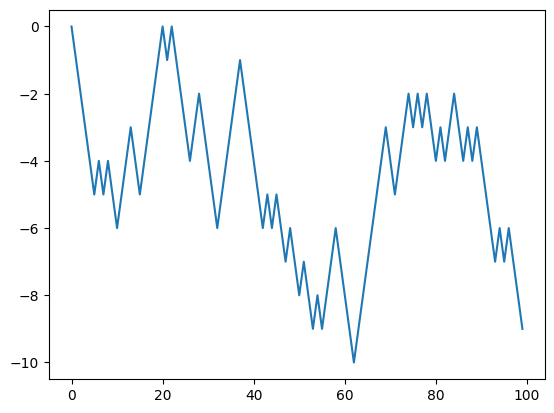

In [40]:
import random
position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)
plt.plot(walk[:100])

In [55]:
nsteps = 1000
draws = np.random.randint(0, 2, size=nsteps)
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()
walk.min()


-22

In [57]:
walk.max()

8

In [58]:
# Whatever the direction, the maximum steps for either positive or negative way.
(np.abs(walk) >= 10).argmax()

261

In [59]:
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0, 2, size=(nwalks, nsteps)) # 0 or 1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)
walks

array([[ 1,  0,  1, ..., 54, 55, 56],
       [ 1,  2,  3, ..., 42, 41, 42],
       [-1, -2, -1, ..., 76, 75, 76],
       ...,
       [ 1,  0,  1, ...,  2,  1,  0],
       [-1, -2, -1, ..., 20, 19, 20],
       [-1,  0, -1, ..., 26, 25, 24]])

In [60]:
# maximum and minimum values obtained over all of the walks
walks.max()

110

In [61]:
# maximum and minimum values obtained over all of the walks
walks.min()

-115

In [62]:
hits30 = (np.abs(walks) >= 30).any(1)
hits30

array([ True,  True,  True, ..., False, False, False])

In [66]:
 hits30.sum() # Number that hit 30 or -30

3332

In [67]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)

crossing_times.mean()



504.7623049219688

In [73]:
steps = np.random.normal(loc=0, scale=0.25,size=(nwalks, nsteps))
steps

array([[ 0.53510057, -0.37221856, -0.42644108, ..., -0.0979706 ,
         0.58193952,  0.09212567],
       [-0.4091851 ,  0.40623877, -0.03182668, ...,  0.31739837,
         0.13559655,  0.28043611],
       [ 0.12516134, -0.1081496 ,  0.02828143, ...,  0.20672903,
        -0.03753876,  0.15263135],
       ...,
       [-0.14268296, -0.36193567, -0.11012443, ...,  0.17508133,
        -0.0249084 , -0.20713887],
       [ 0.17448704,  0.10296609, -0.04209367, ..., -0.00624759,
         0.0293906 , -0.02014113],
       [-0.11001612, -0.39690081,  0.27391558, ..., -0.12169061,
         0.04061478, -0.27484141]])

In [74]:
# Getting started with pandas
import pandas as pd
from pandas import Series, DataFrame

In [75]:
obj = pd.Series([4, 7, -5, 3])
obj

0    4
1    7
2   -5
3    3
dtype: int64

In [76]:
obj.values

array([ 4,  7, -5,  3], dtype=int64)

In [77]:
obj.index # like range(4)

RangeIndex(start=0, stop=4, step=1)

In [80]:
obj2 = pd.Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])
obj2

d    4
b    7
a   -5
c    3
dtype: int64